# 3 - Pre-process remote sensing time series
This notebook applies reinterpolation and smoothing to time series

## Setup

In [1]:
# Import libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set working directory
os.chdir(os.path.join('D:/',
                      'McKinley'))

## Restore RS time series data

In [3]:
# Open the saved DF
%store -r landsat_8_time_series

# Convert index to date-time
landsat_8_time_series.index = pd.to_datetime(landsat_8_time_series.index)

# Select a single SU for testing purposes
#seeding_unit = 816
#landsat_8_time_series_subset = landsat_8_time_series[landsat_8_time_series['SuId']==seeding_unit]

# Sort the DF by date
landsat_8_time_series.sort_index(inplace=True)
landsat_8_time_series

,SuId,MeanNdvi
date,,
2013-05-03,172,0.062723
2013-05-03,2599,0.151249
2013-05-03,2600,0.190379
2013-05-03,2601,0.169873
2013-05-03,816,0.135345
...,...,...
2021-05-25,2621,0.144343
2021-05-25,1558,0.154674
2021-05-25,2648,0.142814


## Resample data to consistent temporal sampling

In [4]:
# Resample the data
landsat_8_time_series_interpol = landsat_8_time_series.groupby('SuId').resample('M').mean()

# Interpolate the missing values
landsat_8_time_series_interpol['MeanNdvi'] = landsat_8_time_series_interpol['MeanNdvi'].interpolate()

# Drop the SuId column
landsat_8_time_series_interpol.drop(columns=['SuId'], inplace=True)
landsat_8_time_series_interpol

MeanNdvi
SuId date                
172  2013-05-31  0.062723
     2013-06-30  0.084139
     2013-07-31  0.172309
     2013-08-31  0.169243
     2013-09-30  0.166178
...                   ...
2650 2021-01-31  0.143415
     2021-02-28  0.138436
     2021-03-31  0.133458
     2021-04-30  0.128479
     2021-05-31  0.153262

[4074 rows x 1 columns]

## Calculate moving window

In [5]:
landsat_8_time_series_rlmean = landsat_8_time_series_interpol.rolling(window = 24).mean()
landsat_8_time_series_rlmean

MeanNdvi
SuId date                
172  2013-05-31       NaN
     2013-06-30       NaN
     2013-07-31       NaN
     2013-08-31       NaN
     2013-09-30       NaN
...                   ...
2650 2021-01-31  0.166747
     2021-02-28  0.167845
     2021-03-31  0.167633
     2021-04-30  0.166740
     2021-05-31  0.166292

[4074 rows x 1 columns]

## Plot the results

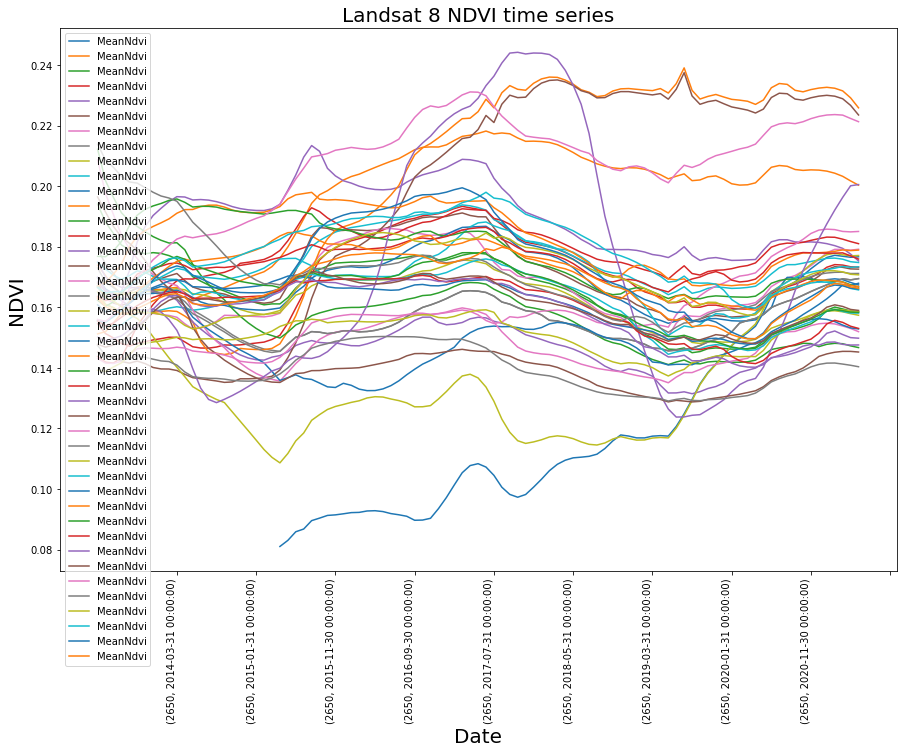

In [6]:
# Setup plot
fig, ax = plt.subplots(figsize=(15, 10))

#landsat_8_time_series_subset.plot(y='MeanNdvi', ax=ax, use_index=True)
#landsat_8_time_series_subset_interpol.plot(y='MeanNdvi', ax=ax, use_index=True)
#landsat_8_time_series_subset_interpol.rolling(window = 26).mean().plot(y='MeanNdvi', ax=ax, use_index=True)
landsat_8_time_series_rlmean.groupby('SuId').plot(y='MeanNdvi', ax=ax, use_index=True)

plt.xlabel("Date", fontsize=20)
plt.ylabel("NDVI", fontsize=20)

ax.set_title(
    "Landsat 8 NDVI time series", fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

## Save the DF for use in subsequent notebooks

In [7]:
%store landsat_8_time_series_rlmean

Stored 'landsat_8_time_series_rlmean' (DataFrame)
